In [70]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score


In [49]:

data = pd.read_csv("data/TravelInsurancePrediction.csv", delimiter=",")
data.head(5)


,Unnamed: 0,Age,Employment Type,GraduateOrNot,AnnualIncome,FamilyMembers,ChronicDiseases,FrequentFlyer,EverTravelledAbroad,TravelInsurance
0,0,31,Government Sector,Yes,400000,6,1,No,No,0
1,1,31,Private Sector/Self Employed,Yes,1250000,7,0,No,No,0
2,2,34,Private Sector/Self Employed,Yes,500000,4,1,No,No,1
3,3,28,Private Sector/Self Employed,Yes,700000,3,1,No,No,0
4,4,28,Private Sector/Self Employed,Yes,700000,8,1,Yes,No,0


In [50]:
data.shape

(1987, 10)

In [51]:
data.drop(columns=["Unnamed: 0"], inplace= True)

data.head(5)

,Age,Employment Type,GraduateOrNot,AnnualIncome,FamilyMembers,ChronicDiseases,FrequentFlyer,EverTravelledAbroad,TravelInsurance
0,31,Government Sector,Yes,400000,6,1,No,No,0
1,31,Private Sector/Self Employed,Yes,1250000,7,0,No,No,0
2,34,Private Sector/Self Employed,Yes,500000,4,1,No,No,1
3,28,Private Sector/Self Employed,Yes,700000,3,1,No,No,0
4,28,Private Sector/Self Employed,Yes,700000,8,1,Yes,No,0


In [52]:
data.isnull().sum()

Age                    0
Employment Type        0
GraduateOrNot          0
AnnualIncome           0
FamilyMembers          0
ChronicDiseases        0
FrequentFlyer          0
EverTravelledAbroad    0
TravelInsurance        0
dtype: int64

In [53]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1987 entries, 0 to 1986
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Age                  1987 non-null   int64 
 1   Employment Type      1987 non-null   object
 2   GraduateOrNot        1987 non-null   object
 3   AnnualIncome         1987 non-null   int64 
 4   FamilyMembers        1987 non-null   int64 
 5   ChronicDiseases      1987 non-null   int64 
 6   FrequentFlyer        1987 non-null   object
 7   EverTravelledAbroad  1987 non-null   object
 8   TravelInsurance      1987 non-null   int64 
dtypes: int64(5), object(4)
memory usage: 139.8+ KB


In [54]:
data["TravelInsurance"] = data["TravelInsurance"].map({0: "Não Segurado", 1: "Segurado"})

data.head(5)

,Age,Employment Type,GraduateOrNot,AnnualIncome,FamilyMembers,ChronicDiseases,FrequentFlyer,EverTravelledAbroad,TravelInsurance
0,31,Government Sector,Yes,400000,6,1,No,No,Não Segurado
1,31,Private Sector/Self Employed,Yes,1250000,7,0,No,No,Não Segurado
2,34,Private Sector/Self Employed,Yes,500000,4,1,No,No,Segurado
3,28,Private Sector/Self Employed,Yes,700000,3,1,No,No,Não Segurado
4,28,Private Sector/Self Employed,Yes,700000,8,1,Yes,No,Não Segurado


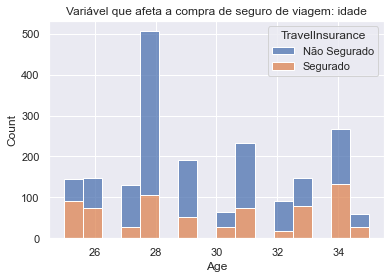

In [55]:
sns.set(style="darkgrid")
sns.histplot(data=data, x="Age", hue="TravelInsurance", multiple="stack").set(title="Variável que afeta a compra de seguro de viagem: idade")
plt.show()

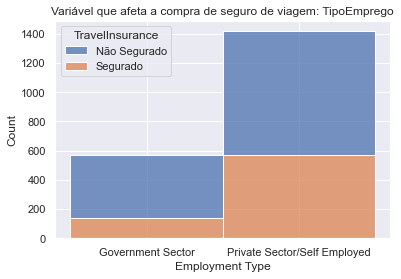

In [56]:
sns.set(style="darkgrid")
sns.histplot(data=data, x="Employment Type", hue="TravelInsurance", multiple="stack").set(title="Variável que afeta a compra de seguro de viagem: TipoEmprego")
plt.show()

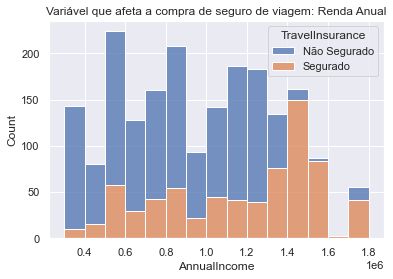

In [57]:
sns.set(style="darkgrid")
sns.histplot(data=data, x="AnnualIncome", hue="TravelInsurance", multiple="stack").set(title="Variável que afeta a compra de seguro de viagem: Renda Anual")
plt.show()

In [58]:
# Tratamento de dados
data["GraduateOrNot"] = data["GraduateOrNot"].map({"No": 0, "Yes": 1})
data["FrequentFlyer"] = data["FrequentFlyer"].map({"No": 0, "Yes": 1})
data["EverTravelledAbroad"] = data["EverTravelledAbroad"].map({"No": 0, "Yes": 1})
x = np.array(data[["Age", "GraduateOrNot", 
                   "AnnualIncome", "FamilyMembers", 
                   "ChronicDiseases", "FrequentFlyer", 
                   "EverTravelledAbroad"]])
y = np.array(data[["TravelInsurance"]])


data.head(5)

,Age,Employment Type,GraduateOrNot,AnnualIncome,FamilyMembers,ChronicDiseases,FrequentFlyer,EverTravelledAbroad,TravelInsurance
0,31,Government Sector,1,400000,6,1,0,0,Não Segurado
1,31,Private Sector/Self Employed,1,1250000,7,0,0,0,Não Segurado
2,34,Private Sector/Self Employed,1,500000,4,1,0,0,Segurado
3,28,Private Sector/Self Employed,1,700000,3,1,0,0,Não Segurado
4,28,Private Sector/Self Employed,1,700000,8,1,1,0,Não Segurado


In [86]:

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.30)
model = DecisionTreeClassifier()
model.fit(X_train, y_train)
predictions = model.predict(X_test)

In [87]:
accuracy = accuracy_score(y_test, predictions)
print('Accuracy score: {}'.format(accuracy))

Accuracy score: 0.7755443886097152
